# THUẬT TOÁN RIDGE REGRESSION
# 1. Giới thiệu
Chúng ta sẽ thực hiện dự đoán kết quả thi cuối kỳ dựa trên các điểm thành phần như cw1, mid-term, và cw2. Mô hình sử dụng Ridge Regression (hồi quy Ridge) nhằm giảm thiểu overfitting thông qua tham số regularization λ. Ridge Regression là một dạng hồi quy tuyến tính với một điều khoản thêm vào nhằm phạt các trọng số lớn, làm cho mô hình trở nên ổn định hơn.


# 2. Import các thư viện cần thiết

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

*   NumPy: Thư viện quan trọng cho các phép toán số học trên mảng.

*   matplotlib.pyplot: Sử dụng để vẽ biểu đồ, ví dụ như biểu đồ lỗi theo các giá trị λ.

*   pandas: Được sử dụng để đọc và xử lý dữ liệu từ các file CSV, dữ liệu đầu vào dưới dạng DataFrame.



# 3. Mô tả chi tiết các hàm

# *Trong ridge_plots.py*

**Hàm plot_errors**

In [13]:
def plot_errors(lamda_values, errors):
    plt.plot(lamda_values, errors)
    plt.xlabel('Giá trị λ')
    plt.ylabel('Lỗi trung bình')
    plt.title('Lỗi theo các giá trị λ')
    plt.show()



*   Vẽ biểu đồ lỗi trung bình theo các giá trị λ, cho phép người dùng thấy rõ mối quan hệ giữa λ và lỗi.



# *Trong ridge_utils.py*

**Hàm load_fold_data**

In [14]:
def load_fold_data(fold_number):
    """Đọc dữ liệu của một fold từ file CSV."""
    train_data = pd.read_csv(f'data/split/K-folds/fold_{fold_number}_train.csv')
    val_data = pd.read_csv(f'data/split/K-folds/fold_{fold_number}_val.csv')

    # Tách biến đầu vào (cw1, mid-term, cw2) và biến đầu ra (final)
    X_train = train_data[['cw1', 'mid-term', 'cw2']].values
    y_train = train_data['final'].values

    X_val = val_data[['cw1', 'mid-term', 'cw2']].values
    y_val = val_data['final'].values

    return X_train, y_train, X_val, y_val



*   Đọc dữ liệu cho một fold cụ thể từ file CSV.




**Hàm load_data_from**

In [15]:
def load_data_from(path):
    input = pd.read_csv(f'{path}')
    data = input[['cw1', 'mid-term', 'cw2']].values
    label = input[['final']].values
    return data, label



*  Tải dữ liệu từ file CSV và tách thành đầu vào và đầu ra.




# *Trong ridge_model.py*

**Hàm ridge_regression**

In [16]:
def ridge_regression(X, y, lamda):
    ones = np.ones((X.shape[0], 1))
    Xbar = np.concatenate((ones, X), axis=1)

    A = np.dot(Xbar.T, Xbar) + lamda * np.identity(Xbar.shape[1])
    b = np.dot(Xbar.T, y)
    w = np.dot(np.linalg.pinv(A), b)

    return w



*  Đọc dữ liệu cho một fold cụ thể từ file CSV.


**Hàm train_on_folds**

In [17]:
def train_on_folds(fold_count, lamda_values):
    best_lamda = None
    lowest_error = float('inf')
    avg_errors = []

    for lamda in lamda_values:
        fold_errors = []
        for i in range(fold_count):
            X_train, y_train, X_val, y_val = load_fold_data(i)
            w = ridge_regression(X_train, y_train, lamda)
            y_pred = np.dot(np.concatenate((np.ones((X_val.shape[0], 1)), X_val), axis=1), w)
            error = np.mean((y_val - y_pred) ** 2)
            fold_errors.append(error)

        avg_error = np.mean(fold_errors)
        avg_errors.append(avg_error)

        if avg_error < lowest_error:
            lowest_error = avg_error
            best_lamda = lamda

    return best_lamda, avg_errors





*  Hàm này thực hiện cross-validation để tìm λ tối ưu. Nó đọc dữ liệu cho từng fold, huấn luyện mô hình và tính lỗi trung bình.



**Hàm predict**

In [18]:
def predict(X, w):
    """
    Dự đoán đầu ra từ X với trọng số w.
    """
    ones = np.ones((X.shape[0], 1))
    Xbar = np.concatenate((ones, X), axis=1)
    return np.dot(Xbar, w)



*  Dự đoán đầu ra từ đầu vào X với trọng số w.




**Hàm train_on_folds_with_sklearn**

In [ ]:
def train_on_folds_with_sklearn(fold_count, lamda_values):
    """
    Huấn luyện mô hình Ridge Regression sử dụng scikit-learn trên từng fold từ các file CSV.
    fold_count: Số lượng fold (5 folds).
    lamda_values: Danh sách các giá trị lambda cần kiểm tra.
    """
    best_lamda = None
    lowest_error = float('inf')
    avg_errors = []  # Danh sách lưu trữ lỗi trung bình cho mỗi λ

    for lamda in lamda_values:
        fold_errors = []

        # Huấn luyện và đánh giá trên từng fold
        for i in range(fold_count):
            # Đọc dữ liệu cho fold thứ i
            X_train, y_train, X_val, y_val = utils.load_fold_data(i)

            # Huấn luyện mô hình Ridge Regression với scikit-learn
            ridge_model = Ridge(alpha=lamda)
            ridge_model.fit(X_train, y_train)

            # Dự đoán trên tập val
            y_pred = ridge_model.predict(X_val)

            # Tính lỗi (Mean Squared Error) cho fold này
            error = np.mean((y_val - y_pred) ** 2)
            fold_errors.append(error)

        # Tính lỗi trung bình qua các fold
        avg_error = np.mean(fold_errors)
        avg_errors.append(avg_error)  # Lưu lỗi trung bình vào danh sách

        if avg_error < lowest_error:
            lowest_error = avg_error
            best_lamda = lamda

        print(f"Lambda = {lamda}, Average Fold Error = {avg_error}")

    return best_lamda, avg_errors



*   Hàm sử dụng thư viện sklearn để tìn ra giá trị lamda tốt nhất



# 4. Thiết lập các giá trị λ cần kiểm tra


In [19]:
lamda_values = np.logspace(-2, 1, num=100)


**Giải thích:**


*  lamda_values là danh sách các giá trị λ từ
10^-2 đến 10^1 (0.01 đến 10), được tạo trên thang logarit. Điều này giúp chúng ta kiểm tra ảnh hưởng của các giá trị lambda khác nhau lên mô hình.

#5. Huấn luyện mô hình và tìm giá trị λ tối ưu


In [20]:
best_lamda, avg_errors = train_on_folds(fold_count=5, lamda_values=lamda_values)
print(f'Giá trị λ tối ưu: {best_lamda}')

Giá trị λ tối ưu: 8.111308307896872


**Giải thích:**

*   train_on_folds: Chúng ta chia dữ liệu thành 5 fold để thực hiện cross-validation. Mỗi lần huấn luyện, mô hình được huấn luyện trên 4 fold và kiểm tra trên 1 fold còn lại.
*  best_lamda: Trả về giá trị λ mang lại lỗi thấp nhất (tốt nhất) trên các fold.







# 6. Lưu mô hình với λ tốt nhất

In [22]:
X_train, y_train = load_data_from(f'data/split/train_data.csv')
w = ridge_regression(X_train, y_train, best_lamda)
print('Trọng số w = ', w)
np.save('ridge_model_weights.npy', w)


Trọng số w =  [[-0.07498871]
 [-0.02272326]
 [ 0.08349226]
 [ 0.93073971]]


**Giải thích:**

*  ridge_regression: Hàm chính thực hiện thuật toán Ridge Regression để tính trọng số w dựa trên giá trị λ tốt nhất.
*   np.save: Lưu trọng số đã tính toán được vào file .npy để sau này có thể tải lại và sử dụng khi dự đoán





#7. Dự đoán trên tập test


In [23]:
X_test, y_test = load_data_from(f'data/split/test_data.csv')
weights = np.load('ridge_model_weights.npy')  # Tải trọng số từ file
y_pred = predict(X_test, weights)


**Giải thích:**

*  Chúng ta tải dữ liệu test và trọng số đã huấn luyện để dự đoán kết quả.
*  predict: Hàm dự đoán đầu ra dựa trên dữ liệu test và trọng số w đã huấn luyện.






# 8. Tính lỗi và vẽ biểu đồ lỗi theo các giá trị λ

Lỗi trung bình trên tập test: 0.3647525925528757


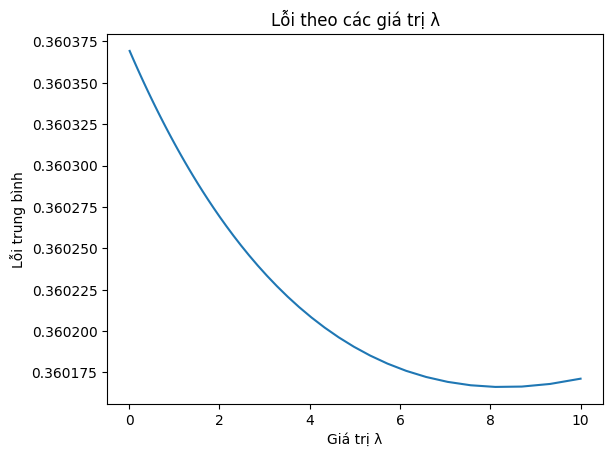

In [24]:
mse_test = np.mean((y_test - y_pred) ** 2)
print(f'Lỗi trung bình trên tập test: {mse_test}')
plot_errors(lamda_values, avg_errors)

**Giải thích:**

*   mse_test: Tính lỗi bình phương trung bình (Mean Squared Error - MSE) trên tập test, giúp đánh giá mức độ chính xác của mô hình.
*   plot_errors: Vẽ biểu đồ lỗi theo từng giá trị λ, cho phép trực quan hóa kết quả để kiểm tra xem mô hình có hoạt động tốt hay không.






# 9.Hàm vẽ biểu đồ phân tán

In [ ]:
def plot_final_scores_comparison(X_test, y_test, y_pred):
    # Vẽ biểu đồ phân tán
    plt.figure(figsize=(6, 6))  # Điều chỉnh kích thước biểu đồ (bé hơn)

    plt.scatter(y_test, y_pred, color='blue', label='Dự đoán', alpha=0.7)

    # Vẽ đường thẳng y = x để so sánh
    x = np.linspace(0, 10, 100)
    plt.plot(x, x, color='red', linestyle='--', label='Giá trị thực')

    # Giới hạn trục từ 0 đến 10
    plt.xlim(0, 10)
    plt.ylim(0, 10)

    # Thêm các thông số của biểu đồ
    plt.xlabel('Giá trị nhãn thực tế')
    plt.ylabel('Giá trị nhãn dự đoán ')
    plt.title('So sánh nhãn thực tế và nhãn lý thuyết')
    plt.axhline(0, color='black', linewidth=0.5, ls='--')
    plt.axvline(0, color='black', linewidth=0.5, ls='--')
    plt.grid(True)
    plt.legend()

    # Hiển thị biểu đồ
    plt.show()


**Giải thích :**

# 10.Tải Dữ Liệu và Huấn Luyện Ridge Regression

**1.Tải dữ liệu trên fold**

In [ ]:
def load_fold_data(fold_number):
    train_data = pd.read_csv(f'data/split/K-folds/fold_{fold_number}_train.csv')
    val_data = pd.read_csv(f'data/split/K-folds/fold_{fold_number}_val.csv')

    # Tách biến đầu vào (cw1, mid-term, cw2) và biến đầu ra (final)
    X_train = train_data[['cw1', 'mid-term', 'cw2']].values
    y_train = train_data['final'].values

    X_val = val_data[['cw1', 'mid-term', 'cw2']].values
    y_val = val_data['final'].values

    return X_train, y_train, X_val, y_val




*   Hàm load_fold_data(i) sẽ lấy dữ liệu của từng fold từ tệp CSV chứa dữ liệu train và validation của fold đó.
*   X_train và X_val: Là các ma trận chứa các thuộc tính .Các cột cw1, mid-term, và cw2 là các giá trị đầu vào
*   y_train và y_val: Là các vector chứa nhãn mục tiêu là cột final là điểm thi cuối cùng mô hình dự đoán




**2.Huấn luyện mô hình Ridge Regression**

In [ ]:
def ridge_regression(X, y, lamda):
    """
    X: Ma trận thuộc tính  (các cột cw1, mid-term, cw2).
    y: nhãn (cột final).
    lamda: Tham số regularization λ.
    """
    # Thêm cột bias (cột toàn số 1)
    ones = np.ones((X.shape[0], 1))
    Xbar = np.concatenate((ones, X), axis=1)

    # Tính trọng số Ridge Regression theo công thức
    A = np.dot(Xbar.T, Xbar) + lamda * np.identity(Xbar.shape[1])
    b = np.dot(Xbar.T, y)
    w = np.dot(np.linalg.pinv(A), b)

    return w

**Giải thích :**



*   Thêm cột bias vào ma trận thuộc tính X.
*   Tính trọng số w dựa trên công thức của Ridge Regression
*   Trả về trọng số w.






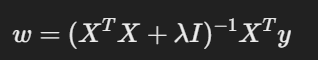



3.Dự đoán nhãn mục tiêu

In [ ]:
def predict(X, w):
    """
    Dự đoán đầu ra từ X với trọng số w.
    """
    ones = np.ones((X.shape[0], 1))
    Xbar = np.concatenate((ones, X), axis=1)
    return np.dot(Xbar, w)

**Giải thích**




*  ones = tạo ra một ma trận toàn giá trị 1 với số hàng bằng số mẫu dữ liệu trong X và một cột duy nhất.
*  np.concatenate: Hàm này dùng để nối hai mảng (hoặc ma trận) lại với nhau.
*  Trả về nhãn đầu ra từ dữ liệu X bằng cách nhân ma trận X đã thêm bias với trọng số w.




# 11.Huấn Luyện Ridge Regression Trên Các Fold

**1.Fold_0**

*- fold_0_train*

In [ ]:
X_train, y_train = load_data_from('data/split/K-folds/fold_0_train.csv')

In [ ]:
X_test, y_test = load_data_from('data/split/K-folds/fold_0_train.csv')

Giải thích :



*    Đọc dữ liệu từ fold_0_train để huấn luyện mô hình với giá trị λ tốt nhất




In [ ]:
w = ridge_regression(X_train, y_train, best_lamda)
print('Trọng số w = ', w)

Trọng số w =  [[-0.01063364]
 [-0.01134697]
 [ 0.07258773]
 [ 0.92138226]]


In [ ]:

np.save('ridge_model_weights.npy', w)

**Giải thích :**



*   Huấn luyện mô hình Ridge Regression với giá trị λ tối ưu và được trọng số huan luyện vào file




In [ ]:
weights = np.load('ridge_model_weights.npy')
y_pred = predict(X_test, weights)

**Giải thích :**



*   Tải trọng số từ file vừa lưu
*   Thực hiện phép nhân ma trận giữa X_test (ma trận đầu vào của tập kiểm tra) và weights (các trọng số của mô hình) để thu được các giá trị dự đoán y_pred.



In [ ]:
mse_test = np.mean((y_test - y_pred) ** 2)
print(f'Lỗi trung bình trên tập train: {mse_test}')


Lỗi trung bình trên tập train: 0.3617713761484752


**Giải thích :**

Trung bình lỗi bình phương MSE :
- y_test: Là vector chứa các giá trị nhãn thực tế (ground truth) của tập dữ liệu kiểm tra.
- y_pred: Là vector chứa các giá trị dự đoán (predicted values) trên tập dữ liệu kiểm tra.
- y_test - y_pred: Tính sự khác biệt giữa giá trị thực tế và giá trị dự đoán.
- (y_test - y_pred) ** 2: Bình phương sự khác biệt này để loại bỏ dấu.


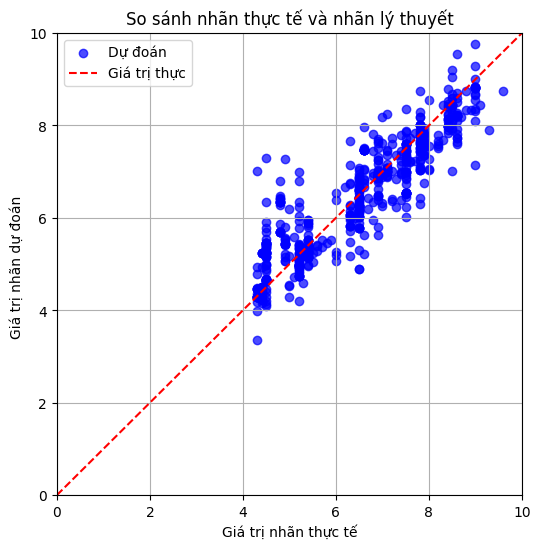

In [ ]:
plot_final_scores_comparison(X_test, y_test, y_pred)

**Biểu đồ phân tán giữa nhãn thực tế và nhãn lý thuyết**

*- fold_0_val*

In [ ]:
X_train, y_train = load_data_from('data/split/K-folds/fold_0_val.csv')

In [ ]:
X_test, y_test = load_data_from(f'data/split/K-folds/fold_0_val.csv')

In [ ]:
w = ridge_regression(X_train, y_train, best_lamda)
print('Trọng số w = ', w)

Trọng số w =  [[-0.11477397]
 [-0.06309927]
 [ 0.12455469]
 [ 0.93201628]]


In [ ]:

np.save('ridge_model_weights.npy', w)

In [ ]:
weights = np.load('ridge_model_weights.npy')
y_pred = predict(X_test, weights)

In [ ]:
mse_test = np.mean((y_test - y_pred) ** 2)
print(f'Lỗi trung bình trên tập val: {mse_test}')

Lỗi trung bình trên tập val: 0.3362177963973936


Lỗi trung bình trên tập val: 0.3362177963973936

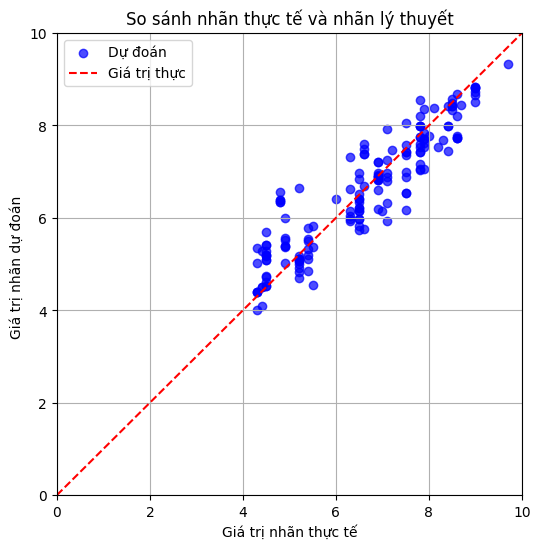

In [ ]:
plot_final_scores_comparison(X_test, y_test, y_pred)

**Biểu đồ phân tán giữa nhãn thực tế và nhãn lý thuyết**

**2.Fold_1**

*-fold_1_train*

In [ ]:
X_train, y_train = load_data_from(f'data/split/K-folds/fold_1_train.csv')

In [ ]:
X_test, y_test = load_data_from(f'data/split/K-folds/fold_1_train.csv')

In [ ]:
w = ridge_regression(X_train, y_train, best_lamda)
print('Trọng số w = ', w)

Trọng số w =  [[-0.07975344]
 [-0.03160928]
 [ 0.08841714]
 [ 0.93758243]]


In [ ]:

np.save('ridge_model_weights.npy', w)

In [ ]:
weights = np.load('ridge_model_weights.npy')
y_pred = predict(X_test, weights)


In [ ]:
mse_test = np.mean((y_test - y_pred) ** 2)
print(f'Lỗi trung bình trên tập train: {mse_test}')

Lỗi trung bình trên tập train: 0.35086300694987094


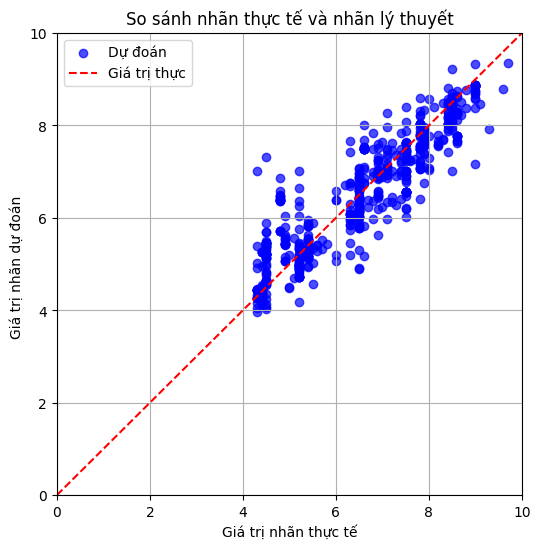

In [ ]:
plot_final_scores_comparison(X_test, y_test, y_pred)

*- flod_1_val*

In [ ]:
X_train, y_train = load_data_from(f'data/split/K-folds/fold_1_val.csv')


In [ ]:
X_test, y_test = load_data_from(f'data/split/K-folds/fold_1_val.csv')

In [ ]:
w = ridge_regression(X_train, y_train, best_lamda)
print('Trọng số w = ', w)

Trọng số w =  [[0.03121956]
 [0.01799462]
 [0.0640157 ]
 [0.88484943]]


In [ ]:

np.save('ridge_model_weights.npy', w)


In [ ]:
weights = np.load('ridge_model_weights.npy')
y_pred = predict(X_test, weights)


In [ ]:
mse_test = np.mean((y_test - y_pred) ** 2)
print(f'Lỗi trung bình trên tập val: {mse_test}')

Lỗi trung bình trên tập val: 0.3759143196354197


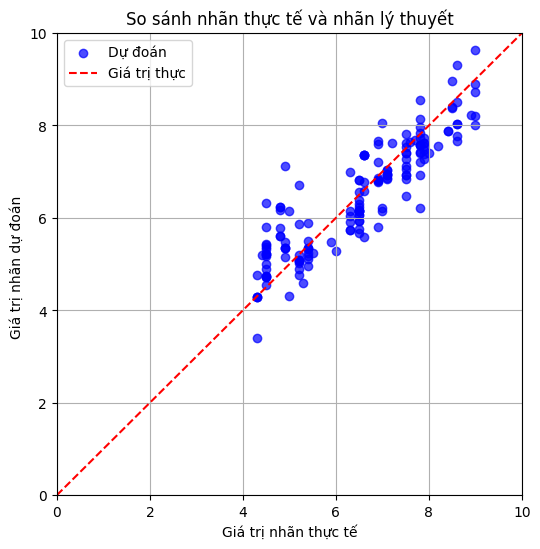

In [ ]:
plot_final_scores_comparison(X_test, y_test, y_pred)

**3. Fold2**

- fold_2_train

In [ ]:
X_train, y_train = load_data_from(f'data/split/K-folds/fold_2_train.csv')

In [ ]:
X_test, y_test = load_data_from(f'data/split/K-folds/fold_2_train.csv')

In [ ]:
w = ridge_regression(X_train, y_train, best_lamda)
print('Trọng số w = ', w)

Trọng số w =  [[-0.02411471]
 [-0.02407467]
 [ 0.08271552]
 [ 0.9221972 ]]


In [ ]:

np.save('ridge_model_weights.npy', w)

In [ ]:
weights = np.load('ridge_model_weights.npy')
y_pred = predict(X_test, weights)


In [ ]:
mse_test = np.mean((y_test - y_pred) ** 2)
print(f'Lỗi trung bình trên tập train: {mse_test}')

Lỗi trung bình trên tập train: 0.3557492517673904


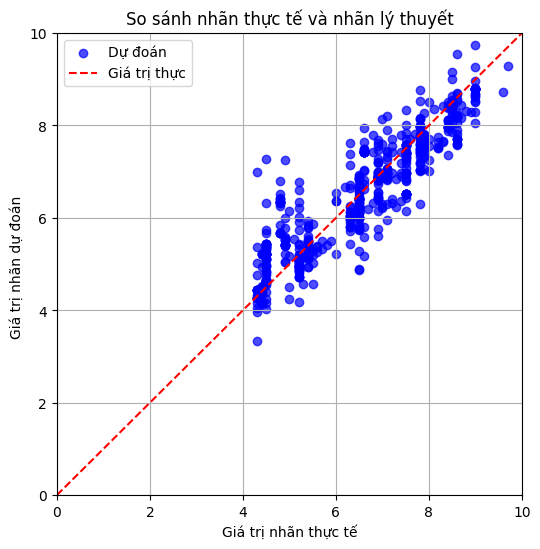

In [ ]:
plot_final_scores_comparison(X_test, y_test, y_pred)

- fold_2_val

In [ ]:
X_train, y_train = load_data_from(f'data/split/K-folds/fold_2_val.csv')


In [ ]:
X_test, y_test = load_data_from(f'data/split/K-folds/fold_2_val.csv')

In [ ]:
w = ridge_regression(X_train, y_train, best_lamda)
print('Trọng số w = ', w)

Trọng số w =  [[-0.08218731]
 [-0.01319405]
 [ 0.08064284]
 [ 0.9371493 ]]


In [ ]:

np.save('ridge_model_weights.npy', w)


In [ ]:
weights = np.load('ridge_model_weights.npy')
y_pred = predict(X_test, weights)


In [ ]:
mse_test = np.mean((y_test - y_pred) ** 2)
print(f'Lỗi trung bình trên tập val: {mse_test}')

Lỗi trung bình trên tập val: 0.35467856560601574


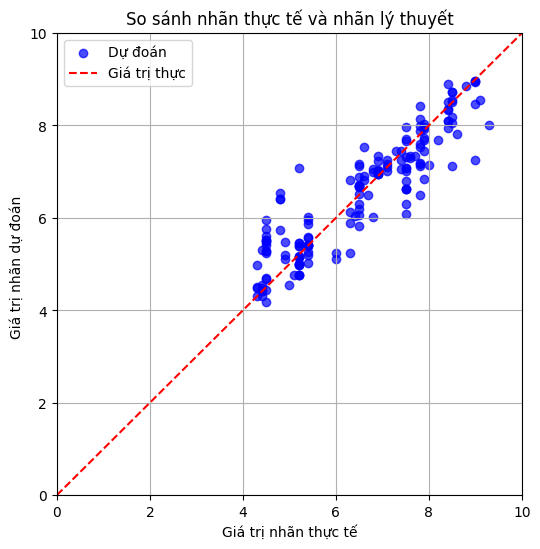

In [ ]:
plot_final_scores_comparison(X_test, y_test, y_pred)

- fold_3_train

In [ ]:
X_train, y_train = load_data_from(f'data/split/K-folds/fold_3_train.csv')

In [ ]:
X_test, y_test = load_data_from(f'data/split/K-folds/fold_3_train.csv')

In [ ]:
w = ridge_regression(X_train, y_train, best_lamda)
print('Trọng số w = ', w)

Trọng số w =  [[-0.07679016]
 [-0.0200134 ]
 [ 0.08685003]
 [ 0.9240349 ]]


In [ ]:

np.save('ridge_model_weights.npy', w)

In [ ]:
weights = np.load('ridge_model_weights.npy')
y_pred = predict(X_test, weights)


In [ ]:
mse_test = np.mean((y_test - y_pred) ** 2)
print(f'Lỗi trung bình trên tập train: {mse_test}')

Lỗi trung bình trên tập train: 0.3622438617426833


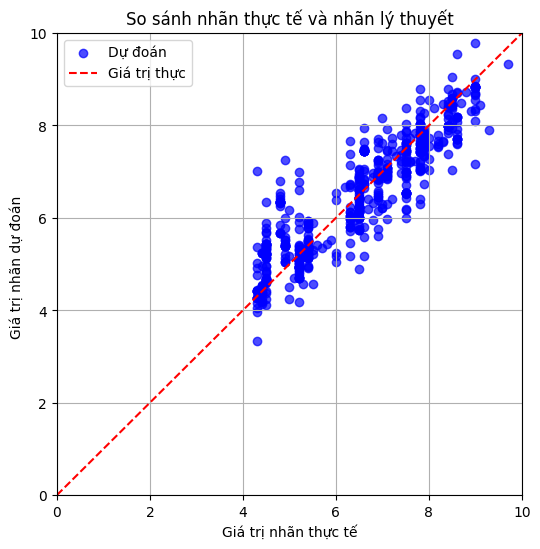

In [ ]:
plot_final_scores_comparison(X_test, y_test, y_pred)

- fold_3_val

In [ ]:
X_train, y_train = load_data_from(f'data/split/K-folds/fold_3_val.csv')


In [ ]:
X_test, y_test = load_data_from(f'data/split/K-folds/fold_3_val.csv')

In [ ]:
w = ridge_regression(X_train, y_train, best_lamda)
print('Trọng số w = ', w)

Trọng số w =  [[ 0.03312838]
 [-0.02420419]
 [ 0.06934615]
 [ 0.93362904]]


In [ ]:

np.save('ridge_model_weights.npy', w)


In [ ]:
weights = np.load('ridge_model_weights.npy')
y_pred = predict(X_test, weights)


In [ ]:
mse_test = np.mean((y_test - y_pred) ** 2)
print(f'Lỗi trung bình trên tập val: {mse_test}')

Lỗi trung bình trên tập val: 0.3354432498930942


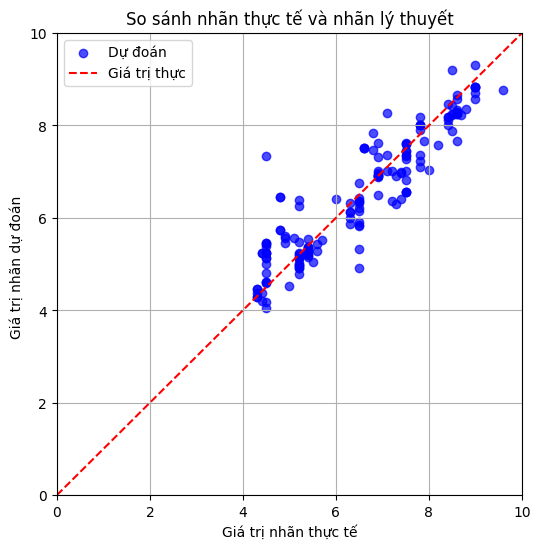

In [ ]:
plot_final_scores_comparison(X_test, y_test, y_pred)

- fold_4_train

In [ ]:
X_train, y_train = load_data_from(f'data/split/K-folds/fold_4_train.csv')

In [ ]:
X_test, y_test = load_data_from(f'data/split/K-folds/fold_4_train.csv')

In [ ]:
w = ridge_regression(X_train, y_train, best_lamda)
print('Trọng số w = ', w)

Trọng số w =  [[-0.13544025]
 [-0.02432025]
 [ 0.08512841]
 [ 0.94065893]]


In [ ]:

np.save('ridge_model_weights.npy', w)

In [ ]:
weights = np.load('ridge_model_weights.npy')
y_pred = predict(X_test, weights)


In [ ]:
mse_test = np.mean((y_test - y_pred) ** 2)
print(f'Lỗi trung bình trên tập train: {mse_test}')

Lỗi trung bình trên tập train: 0.35399415156026076


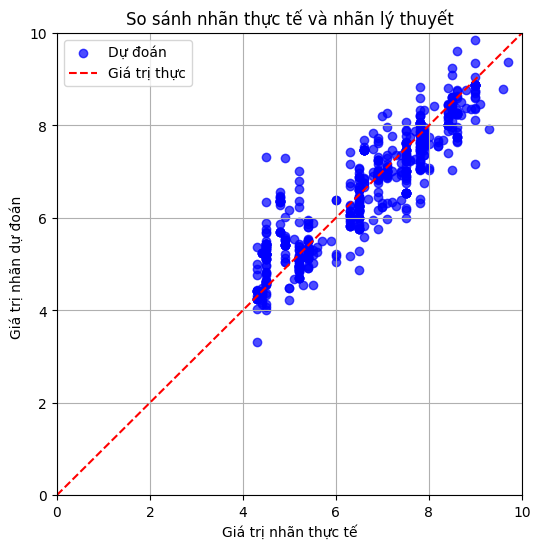

In [ ]:
plot_final_scores_comparison(X_test, y_test, y_pred)

- fold_4_val

In [ ]:
X_train, y_train = load_data_from(f'data/split/K-folds/fold_4_val.csv')


In [ ]:
X_test, y_test = load_data_from(f'data/split/K-folds/fold_4_val.csv')

In [ ]:
w = ridge_regression(X_train, y_train, best_lamda)
print('Trọng số w = ', w)

Trọng số w =  [[0.17436877]
 [0.00163513]
 [0.07224306]
 [0.87500692]]


In [ ]:

np.save('ridge_model_weights.npy', w)


In [ ]:
weights = np.load('ridge_model_weights.npy')
y_pred = predict(X_test, weights)


In [ ]:
mse_test = np.mean((y_test - y_pred) ** 2)
print(f'Lỗi trung bình trên tập val: {mse_test}')

Lỗi trung bình trên tập val: 0.36277859641812227


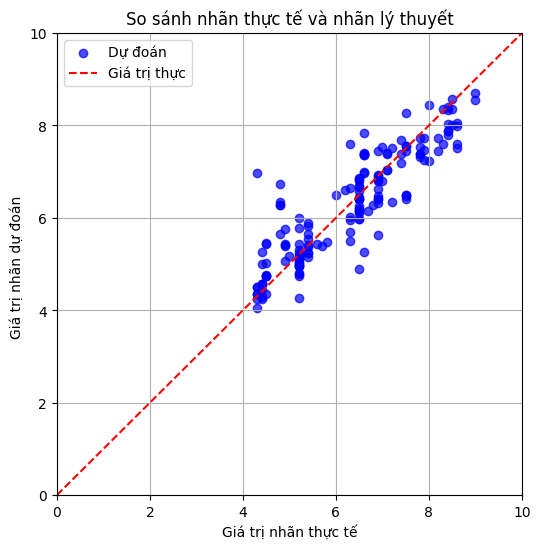

In [ ]:
plot_final_scores_comparison(X_test, y_test, y_pred)

# 12.Giá Trị Sai Số Trung Bình Của Fold

AVG = (MSE(Train_error)+MSE(Val_error))/2

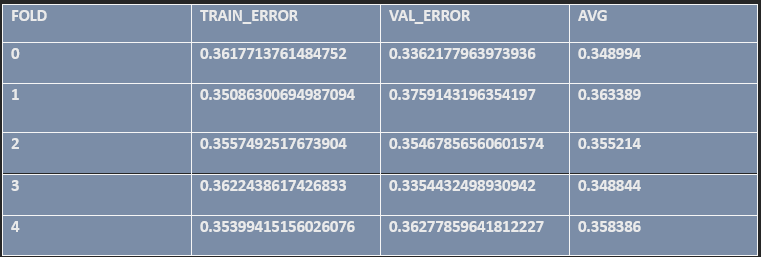

# 13. So sánh kết quả dự đoán với thực tế
**1.   Sử dụng trọng số w của Fold train_data vào mô hình dự đoán**



In [ ]:
X_train, y_train = load_data_from('data/split/train_data.csv')
w = ridge_regression(X_train, y_train, best_lamda)
print('Trọng số w = ', w)
np.save('ridge_model_weights.npy', w)

Trọng số w =  [[-0.07498871]
 [-0.02272326]
 [ 0.08349226]
 [ 0.93073971]]


**Giải thích:**


*   Tải dữ liệu từ Fold train_data và huấn luyện mô hình với giá trị lamda tốt nhất để tìm ra trọng số w của Fold
* Trọng số được tính toán và lưu vào file để sử dụng cho giai đoạn dự đoán sau này.






**2.   Dự đoán trên tập test**



In [ ]:
X_test, y_test = load_data_from('data/split/test_data.csv')
weights = np.load('ridge_model_weights.npy')
y_pred = predict(X_test, weights)



**Giải thích:**

*  Tải dữ liệu test từ tập test_data và trọng số w đã lưu.
*  Sử dụng mô hình để dự đoán điểm final trên tập dữ liệu test.




**3. Vẽ biểu đồ so sánh điểm final dự đoán với thực tế trên tập test**
* **Sử dụng biểu đồ phân tán:** thích hợp với bài toán so sánh 2 biến, giúp phát hiện các giá trị ngoại lệ 1 cách dễ dàng
* Biểu đồ cung cấp một cái nhìn tổng quan về hiệu suất của mô hình, trực quan hóa mối quan hệ giữa giá trị thực tế và giá trị dự đoán trên tập test



In [ ]:
def plot_final_scores_comparison(X_test, y_test, weights):
    y_pred = predict(X_test, weights)
    plt.figure(figsize=(10, 10))
    plt.scatter(y_test, y_pred, color='blue', label='Dự đoán', alpha=0.7)
    x = np.linspace(0, 10, 100)
    plt.plot(x, x, color='red', linestyle='--', label='Giá trị thực')
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.xlabel('Giá trị thực của final')
    plt.ylabel('Giá trị dự đoán của final')
    plt.title('So sánh điểm final dự đoán và thực tế trên tập test')
    plt.axhline(0, color='black', linewidth=0.5, ls='--')
    plt.axvline(0, color='black', linewidth=0.5, ls='--')
    plt.grid()
    plt.legend()
    plt.show()


> Tạo hàm vẽ biểu đồ so sánh kết quả điểm final dự đoán và điểm thực tế trên tập test trong file ridge_plots.py





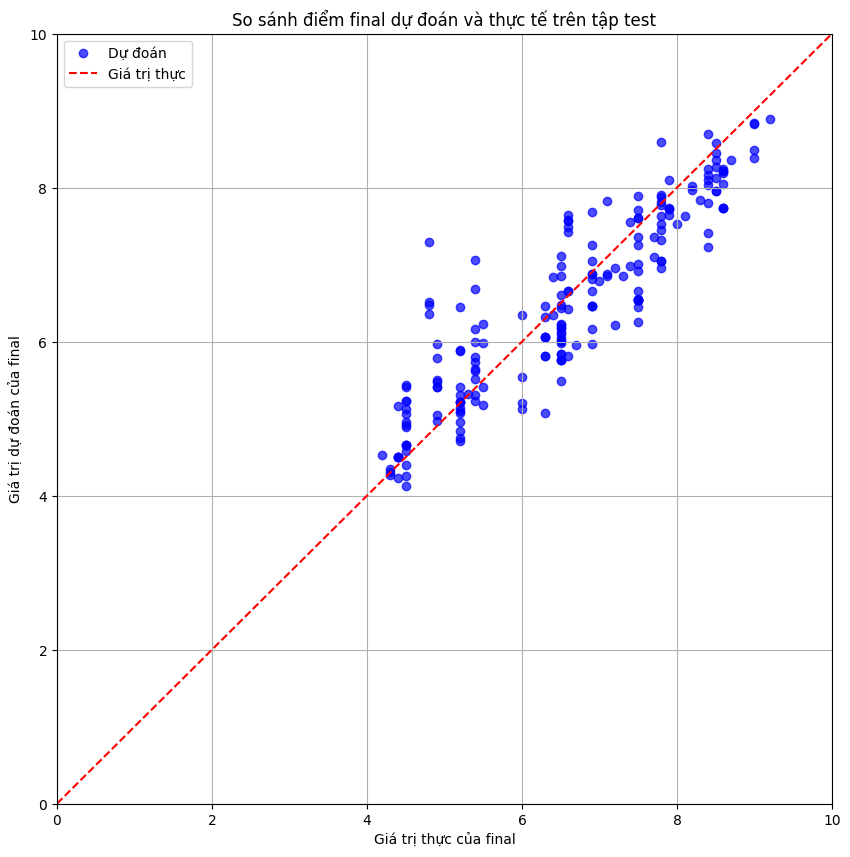

In [ ]:
plot_final_scores_comparison(X_test, y_test,weights)



> Trong file run-ridge-model.py, gọi hàm vẽ biểu đồ đã tạo và chạy chương trình

**Đánh giá hiệu quả mô hình Ridge Regression:**







> **1. Độ chính xác tổng thể:**  

Nhìn chung, các **điểm dự đoán** (chấm xanh) nằm khá sát đường gạch đứt đỏ (**điểm thực tế**), điều này cho thấy mô hình dự đoán tương đối chính xác cho phần lớn các trường hợp, thể hiện rằng mô hình đã học được mối quan hệ hợp lý giữa các biến đầu vào (cw1, mid-term, cw2) và nhãn (final) từ dữ liệu huấn luyện.


> **2. Sai số ở một số điểm ngoại lệ:**

**Ngoại lệ** là điều không thể tránh khỏi khi dự đoán, do dữ liệu huấn luyện có thể chứa một số yếu tố nhiễu nhưng chúng **không làm ảnh hưởng nhiều** đến hiệu suất tổng thể của mô hình vì các điểm ngoại lệ này chỉ **chiếm một phần rất nhỏ** của toàn bộ tập dữ liệu.




